### Import dependencies:

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import statistics
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the train.csv by removing the
# last column since it's an empty column
data = pd.read_csv('Training.csv').dropna(axis = 1)
#isplaying the head
data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
#Checking null values for deliveries.csv
data.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

This dataset is a clean dataset with no null values and all the features consist of 0’s and 1’s

<AxesSubplot: >

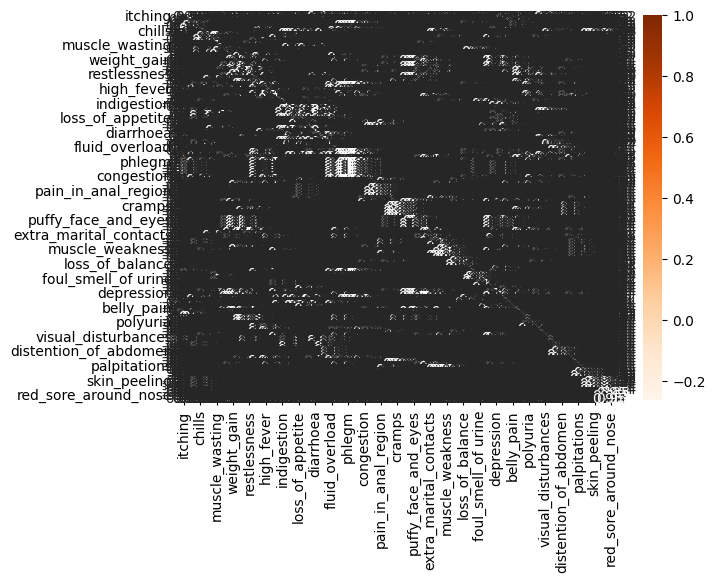

In [5]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap='Oranges',annot=True)

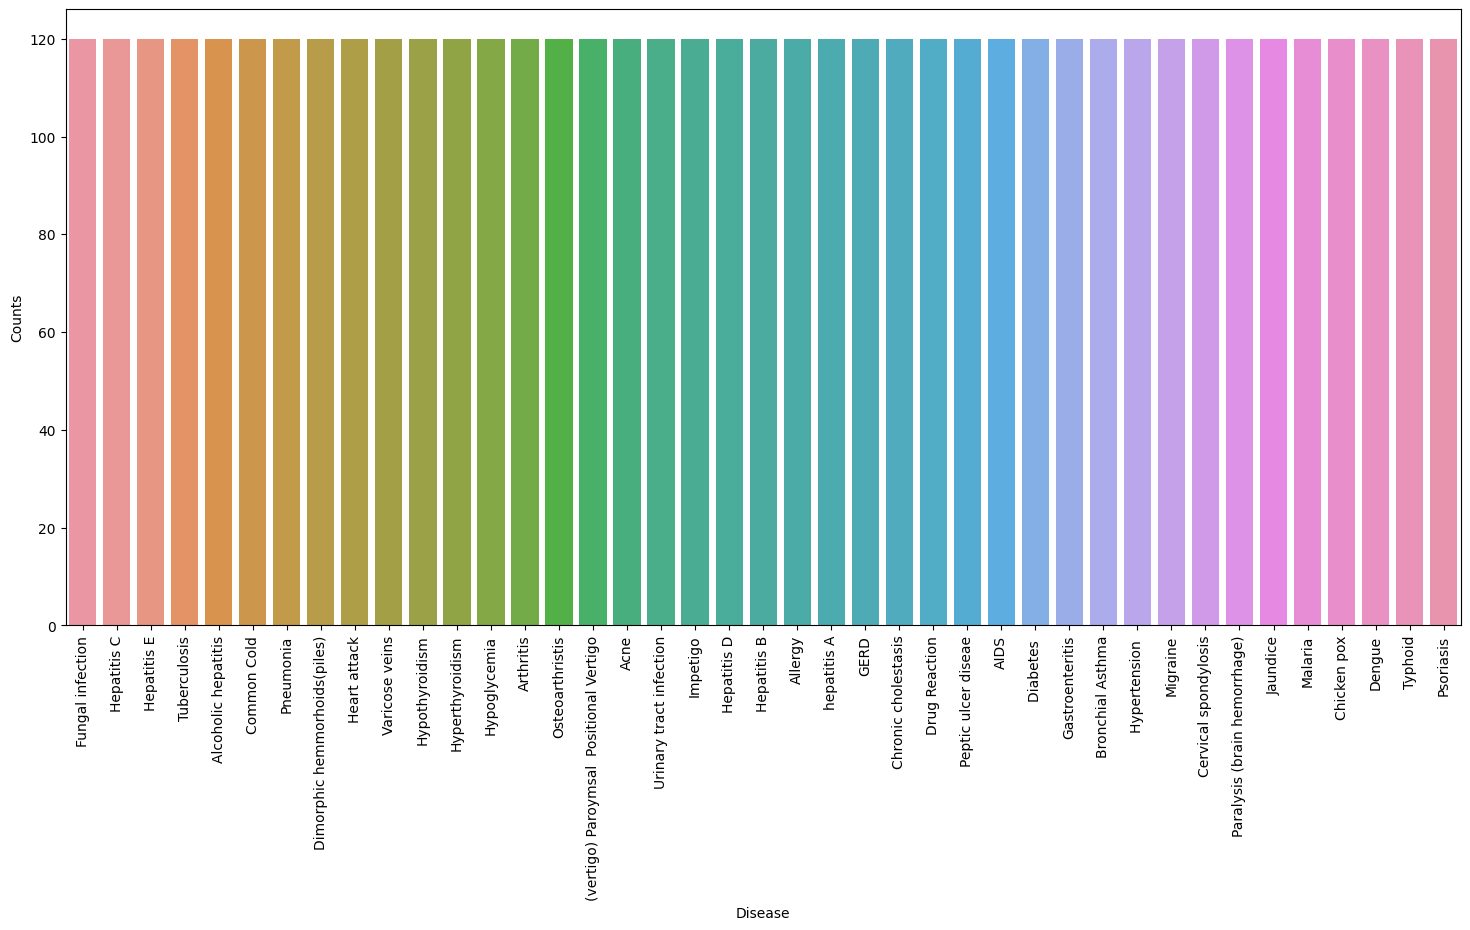

In [6]:
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [7]:
#sns.pairplot(data)
#plt.show()

Dataset is balanced so no further balancing is required

In [8]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [10]:

model1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model1.fit(X_train, y_train)  
Y_pred = model1.predict(X_test)
rmse=np.sqrt(np.mean(((Y_pred- y_test)**2)))
print(rmse)

4.846863798473144


In [11]:

model2 = GaussianNB()
model2.fit(X_train, y_train)  
Y_pred = model2.predict(X_test)
rmse=np.sqrt(np.mean(((Y_pred- y_test)**2)))
print(rmse)

5.959125679308049


In [12]:
model3 = SVC()
model3.fit(X_train, y_train)  
Y_pred = model3.predict(X_test)
rmse=np.sqrt(np.mean(((Y_pred- y_test)**2)))
print(rmse)

4.838657006444687


In [13]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(kernel='poly'),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("--"*40)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")
print("--"*40)

#Any kernel gives the same accuracy 

--------------------------------------------------------------------------------
SVC
Scores: [0.86178862 0.91260163 0.94512195 0.94715447 0.94715447 0.90853659
 0.99593496 1.         0.9796748  0.90853659]
Mean Score: 0.9406504065040651
--------------------------------------------------------------------------------
Gaussian NB
Scores: [0.80081301 0.83739837 0.83536585 0.85162602 0.84552846 0.84146341
 0.87601626 0.90243902 0.90853659 0.83536585]
Mean Score: 0.8534552845528456
--------------------------------------------------------------------------------
Random Forest
Scores: [0.8597561  0.9004065  0.94308943 0.94512195 0.94715447 0.90853659
 0.99593496 1.         0.9796748  0.90853659]
Mean Score: 0.9388211382113821
--------------------------------------------------------------------------------


Accuracy on test data by SVM Classifier: 94.20731707317073


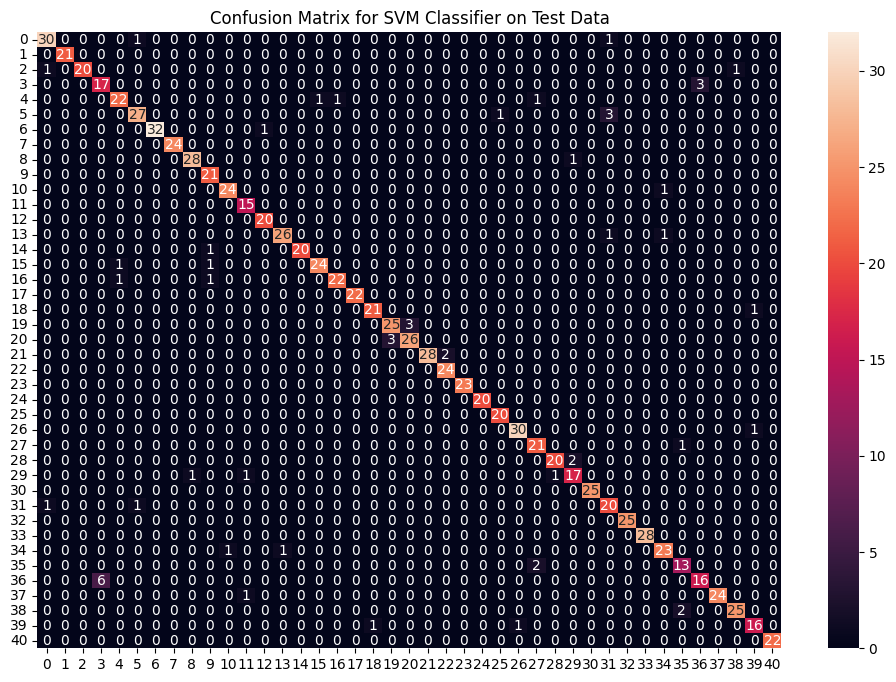

Accuracy on test data by Naive Bayes Classifier: 86.89024390243902


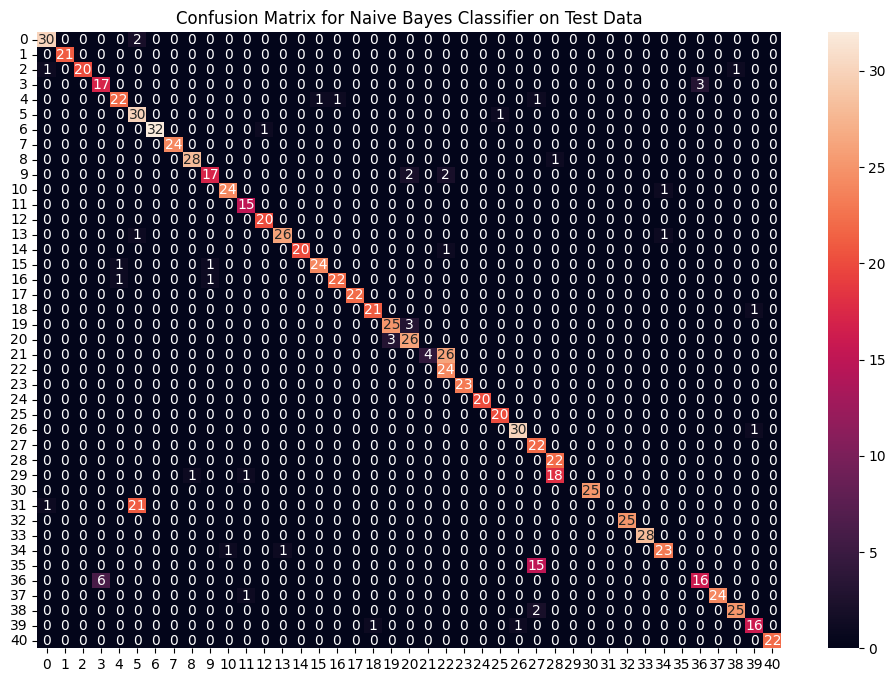

Accuracy on test data by Random Forest Classifier: 94.20731707317073


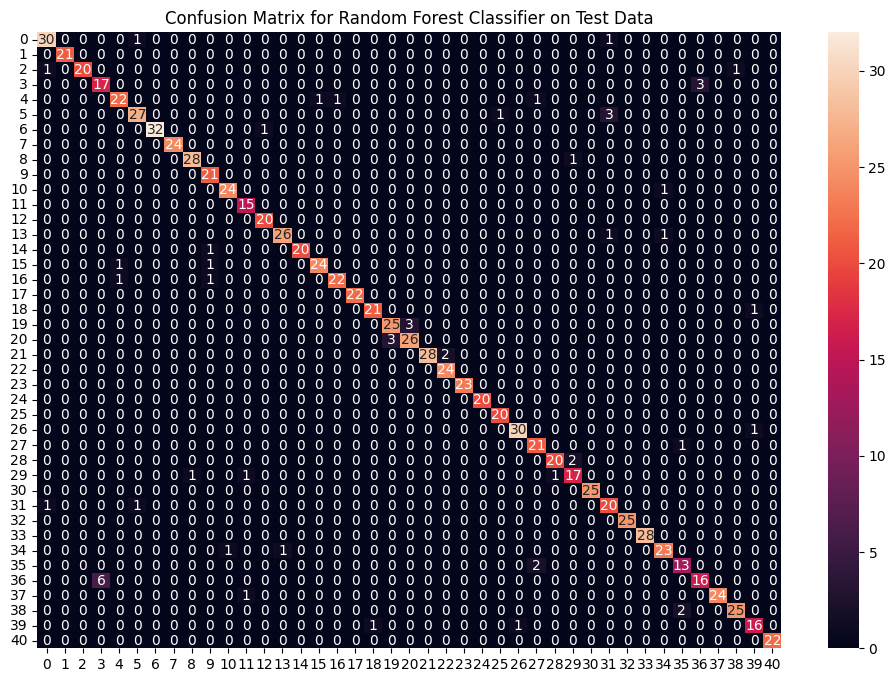

In [14]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()
 
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()
 
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 92.85714285714286


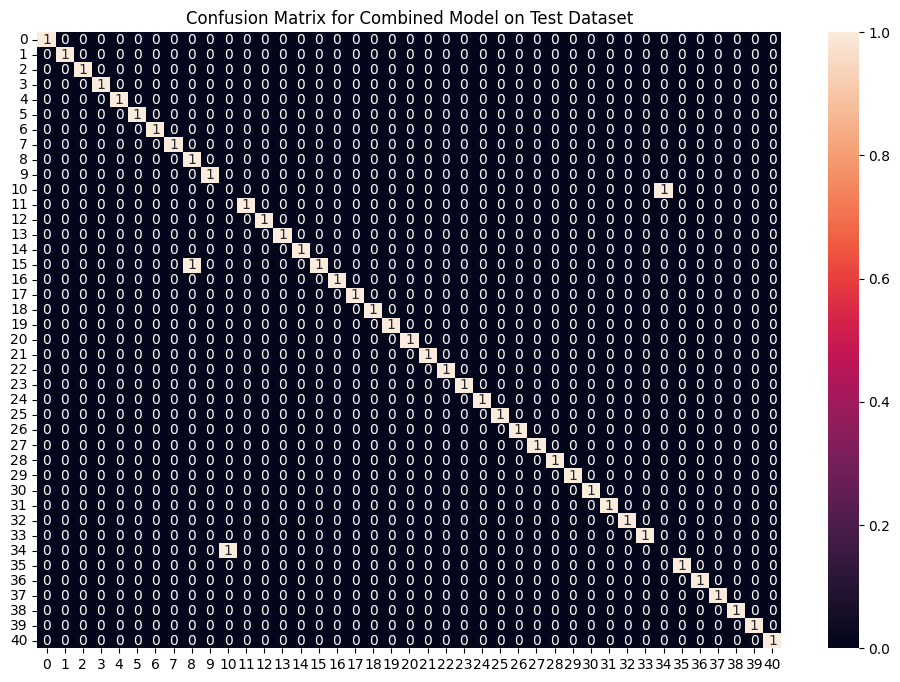

In [15]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)
 
# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
 
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])
 
# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
 
final_preds = [mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]
 
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [21]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {"symptom_index":symptom_index,"predictions_classes":encoder.classes_}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	# creating input data for the models
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		
	# reshaping the input data and converting it
	# into suitable format for model predictions
	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	
	# making final prediction by taking mode of all predictions
	final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
	fpdf=final_prediction
	predictions = {
		"rf_model_prediction": rf_prediction,"naive_bayes_prediction": nb_prediction,"svm_model_prediction": svm_prediction,"final_prediction":fpdf
	}
	return predictions

# Testing the function
print(predictDisease("Fatigue"))


{'rf_model_prediction': 'Varicose veins', 'naive_bayes_prediction': 'Bronchial Asthma', 'svm_model_prediction': 'Urinary tract infection', 'final_prediction': 'Varicose veins'}
